<a href="https://colab.research.google.com/github/Divyanshomer-io/cointegration_ASP/blob/main/ASP_cointegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

In [2]:
NUM_TRADING_DAYS = 252


stocks = ["SUNPHARMA.NS", "DIVISLAB.NS", "CIPLA.NS", "BIOCON.NS", "TORNTPHARM.NS", "LUPIN.NS", "ZYDUSLIFE.NS","AUROPHARMA.NS","PEL.NS"]

start_date = "2017-06-01"
end_date = "2020-06-01"

In [3]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices.dropna()

,SUNPHARMA.NS,DIVISLAB.NS,CIPLA.NS,BIOCON.NS,TORNTPHARM.NS,LUPIN.NS,ZYDUSLIFE.NS,AUROPHARMA.NS,PEL.NS
Date,,,,,,,,,
2017-06-01 00:00:00+05:30,469.884857,562.603149,484.513184,156.920547,544.879517,1087.854736,437.777924,551.596375,1315.738403
2017-06-02 00:00:00+05:30,476.737061,577.976685,498.140289,159.282120,546.571045,1107.594116,459.390289,564.680786,1315.902100
2017-06-05 00:00:00+05:30,474.838745,589.565308,502.604279,161.364853,547.608398,1097.249634,456.043854,564.252625,1311.066895
2017-06-06 00:00:00+05:30,466.967987,589.004395,502.463409,162.611221,547.450562,1092.315063,455.021332,556.830139,1307.422974
2017-06-07 00:00:00+05:30,473.681274,603.536804,507.679260,163.627991,544.766785,1095.588989,499.082642,569.058228,1309.057861
...,...,...,...,...,...,...,...,...,...
2020-05-22 00:00:00+05:30,444.932831,2250.486328,615.821533,346.768921,1219.856445,863.646729,334.386108,706.322693,483.876892
2020-05-26 00:00:00+05:30,435.217102,2226.913818,604.600342,354.688263,1210.734253,876.416443,326.284424,690.908936,459.995239
2020-05-27 00:00:00+05:30,427.397125,2221.772705,609.753418,347.313385,1126.784424,865.388123,325.609314,689.411133,486.008820


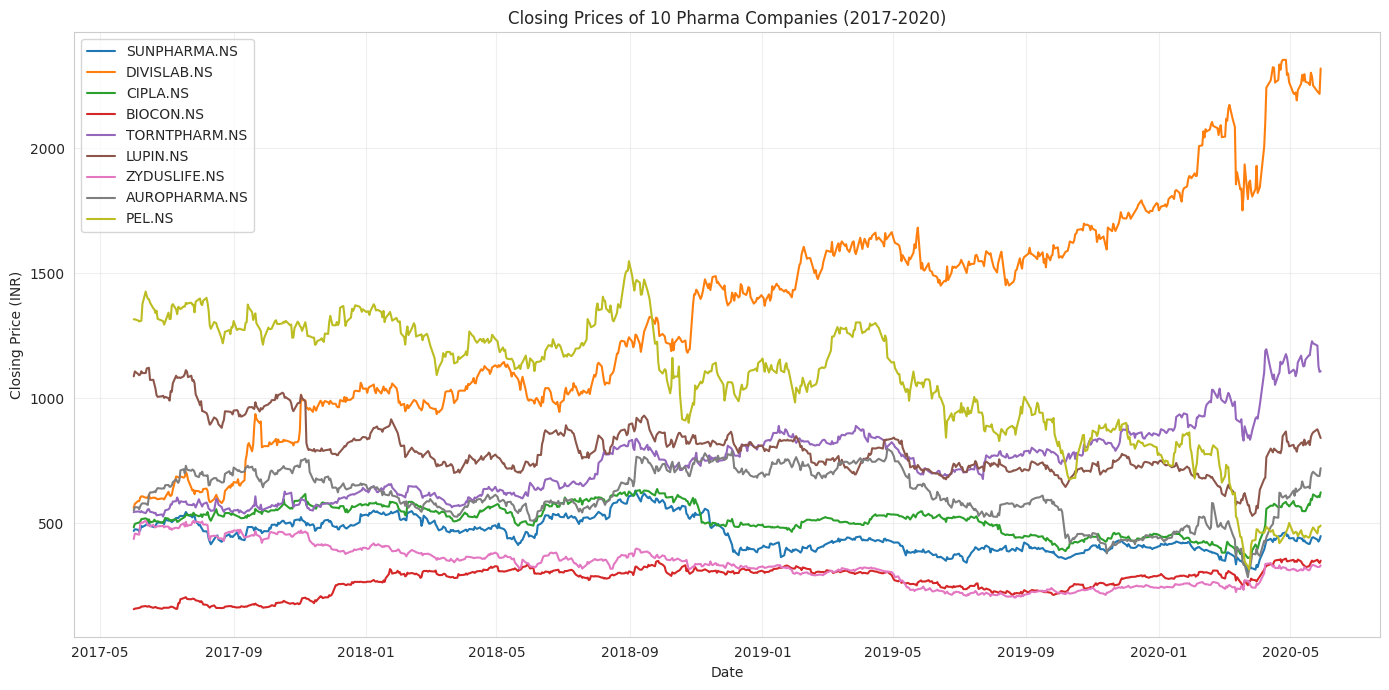

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download data
stock_data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    data = ticker.history(start=start_date, end=end_date)["Close"]
    stock_data[stock] = data

stock_prices = pd.DataFrame(stock_data).dropna()

# Plot all 10 pharma companies
plt.figure(figsize=(14, 7))
for stock in stock_prices.columns:
    plt.plot(stock_prices.index, stock_prices[stock], label=stock)

plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.title('Closing Prices of 10 Pharma Companies (2017-2020)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:

hedge_ratios = {}


stock_symbols = stock_prices.columns


for i in range(len(stock_symbols) - 1):
    for j in range(i + 1, len(stock_symbols)):
        stock_1 = stock_prices[stock_symbols[i]]
        stock_2 = stock_prices[stock_symbols[j]]


        X = sm.add_constant(stock_1)
        model = sm.OLS(stock_2, X).fit()
        hedge_ratio = model.params[stock_symbols[i]]


        pair = (stock_symbols[i], stock_symbols[j])
        hedge_ratios[pair] = hedge_ratio


hedge_ratios

{('SUNPHARMA.NS', 'DIVISLAB.NS'): np.float64(-3.8996806461718547),
 ('SUNPHARMA.NS', 'CIPLA.NS'): np.float64(0.72144414650259),
 ('SUNPHARMA.NS', 'BIOCON.NS'): np.float64(0.025786465344059407),
 ('SUNPHARMA.NS', 'TORNTPHARM.NS'): np.float64(-0.95030810801332),
 ('SUNPHARMA.NS', 'LUPIN.NS'): np.float64(0.9968448351145442),
 ('SUNPHARMA.NS', 'ZYDUSLIFE.NS'): np.float64(0.8752351582355747),
 ('SUNPHARMA.NS', 'AUROPHARMA.NS'): np.float64(0.6523809845740349),
 ('SUNPHARMA.NS', 'PEL.NS'): np.float64(2.6479297856216557),
 ('DIVISLAB.NS', 'CIPLA.NS'): np.float64(-0.0621440397698054),
 ('DIVISLAB.NS', 'BIOCON.NS'): np.float64(0.0661142411471601),
 ('DIVISLAB.NS', 'TORNTPHARM.NS'): np.float64(0.31864901896260167),
 ('DIVISLAB.NS', 'LUPIN.NS'): np.float64(-0.1627930437445626),
 ('DIVISLAB.NS', 'ZYDUSLIFE.NS'): np.float64(-0.14952422432931625),
 ('DIVISLAB.NS', 'AUROPHARMA.NS'): np.float64(-0.08273515298567365),
 ('DIVISLAB.NS', 'PEL.NS'): np.float64(-0.5061715868182549),
 ('CIPLA.NS', 'BIOCON.NS'

In [6]:
#finding the pair using spread
spread_df = pd.DataFrame(index=stock_prices.index)
smallest_magnitude = float('inf')
selected_pair = None

for pair, hedge_ratio in hedge_ratios.items():
    stock1, stock2 = pair
    spread = np.log(stock_prices[stock1]) - hedge_ratio * np.log(stock_prices[stock2])
    spread_df[pair] = spread
    magnitude = np.abs(spread).mean()
    if magnitude < smallest_magnitude:
        smallest_magnitude = magnitude
        selected_pair = pair


selected_pair

('CIPLA.NS', 'LUPIN.NS')

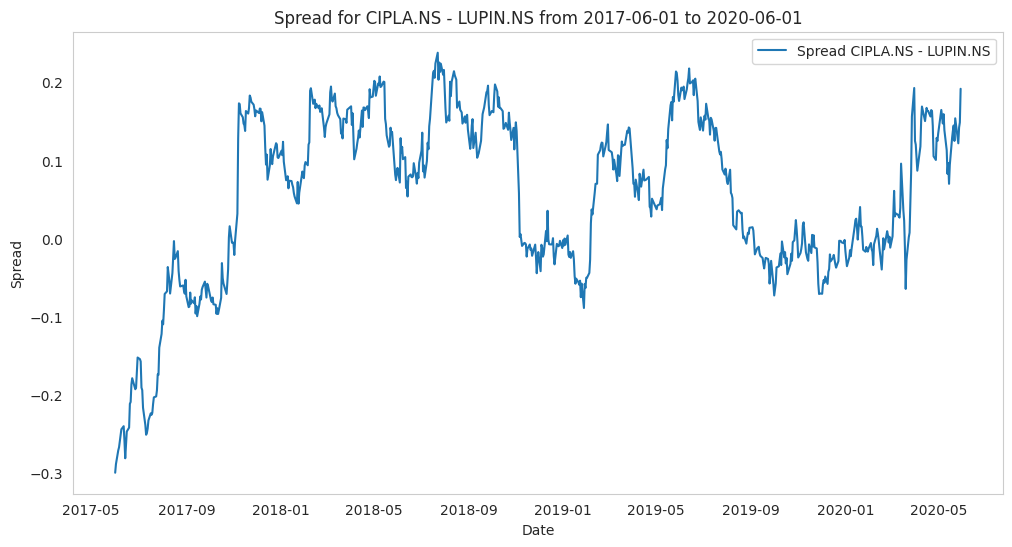

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(spread_df.index, spread_df[selected_pair], label=f"Spread {selected_pair[0]} - {selected_pair[1]}")
plt.title(f"Spread for {selected_pair[0]} - {selected_pair[1]} from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid()
plt.show()

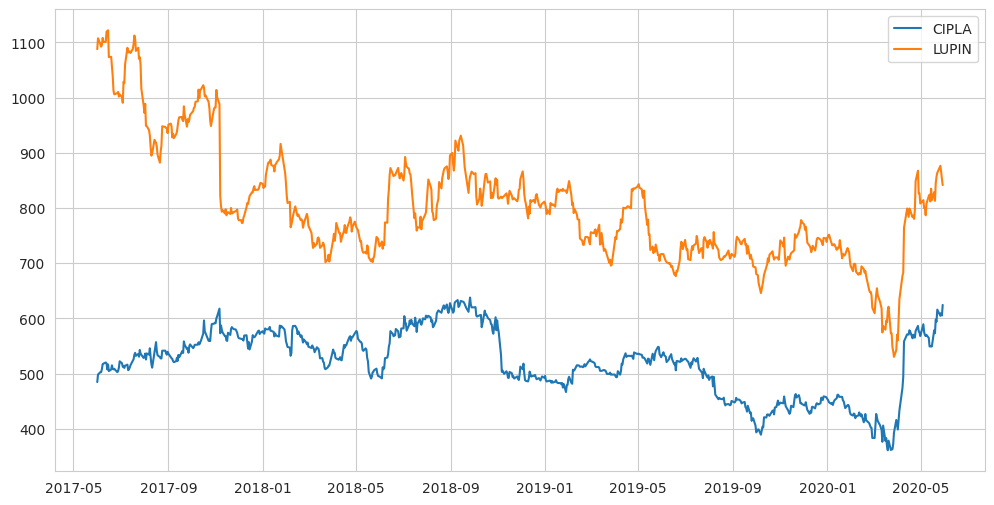

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(stock_prices['CIPLA.NS'], label = 'CIPLA')
plt.plot(stock_prices['LUPIN.NS'], label = 'LUPIN')
plt.legend()
plt.show()

In [9]:
#cointegration test/analysis
spread_df = spread_df[start_date:end_date]
spread_values = spread_df[selected_pair].dropna()
result = adfuller(spread_values)
p_value = result[1]


if p_value < 0.05:
    print(f"The p-value is {p_value}. The signal is stationary with 95% confidence.")
else:
    print(f"The p-value is {p_value}. The signal is not stationary with 95% confidence.")

The p-value is 0.016037406074269123. The signal is stationary with 95% confidence.


In [10]:
#FOR BACKTESTING
fstocks=['CIPLA.NS','LUPIN.NS']
start_date2 = "2020-06-01"
end_date2 = "2023-06-01"
stock_data2 = {}

for stock in fstocks:
  ticker = yf.Ticker(stock)
  stock_data2[stock] = ticker.history(start = start_date2, end = end_date2)['Close']

dataf = pd.DataFrame(stock_data2)
dataf.dropna()

,CIPLA.NS,LUPIN.NS
Date,,
2020-06-01 00:00:00+05:30,618.855652,822.000244
2020-06-02 00:00:00+05:30,614.135986,842.847656
2020-06-03 00:00:00+05:30,617.603516,839.171509
2020-06-04 00:00:00+05:30,636.241394,878.012634
2020-06-05 00:00:00+05:30,626.946655,872.933777
...,...,...
2023-05-25 00:00:00+05:30,920.129517,767.345154
2023-05-26 00:00:00+05:30,925.871460,768.428894
2023-05-29 00:00:00+05:30,930.640259,793.798584


In [11]:
# hedge_ratio_new = {}


stock_symbols_new = dataf.columns

# X1 = sm.add_constant(dataf[stock_symbols_new[0]])
# model1 = sm.OLS(dataf[stock_symbols_new[1]], X1).fit()
# hedge_ratio1 = model1.params[stock_symbols_new[0]]

# print(hedge_ratio1)

spread_new = np.log(dataf[stock_symbols_new[0]]) - 0.9246970926256299 * np.log(dataf[stock_symbols_new[1]])


fdata=pd.DataFrame()

fdata['cipla']=dataf['CIPLA.NS']
fdata['lupin']=dataf['LUPIN.NS']
fdata['spread']=spread_new
fdata



,cipla,lupin,spread
Date,,,
2020-06-01 00:00:00+05:30,618.855652,822.000244,0.221545
2020-06-02 00:00:00+05:30,614.135986,842.847656,0.190730
2020-06-03 00:00:00+05:30,617.603516,839.171509,0.200402
2020-06-04 00:00:00+05:30,636.241394,878.012634,0.188295
2020-06-05 00:00:00+05:30,626.946655,872.933777,0.178942
...,...,...,...
2023-05-25 00:00:00+05:30,920.129517,767.345154,0.681810
2023-05-26 00:00:00+05:30,925.871460,768.428894,0.686726
2023-05-29 00:00:00+05:30,930.640259,793.798584,0.661828


In [18]:
# start_date2 = datetime.strptime(start_date2, "%Y-%m-%d")
# end_date2 = datetime.strptime(end_date2, "%Y-%m-%d")


t = 120

fdata['rolling_mean'] = fdata['spread'].rolling(window=t).mean()
fdata['rolling_std'] = fdata['spread'].rolling(window=t).std()


fdata['z_scores'] = (fdata['spread'] - fdata['rolling_mean']) /fdata['rolling_std']

fdata=fdata.drop('rolling_mean',axis=1)

profit_exit_point=fdata['z_scores'].mean()
print(profit_exit_point)

fdata.dropna()



0.3298461822146672


,cipla,lupin,spread,rolling_std,z_scores,signal1,position1,signal2,position2
Date,,,,,,,,,
2021-11-24 00:00:00+05:30,865.318298,876.034180,0.497900,0.086859,0.970258,0,0.0,0,0.0
2021-11-25 00:00:00+05:30,871.613647,880.489258,0.500458,0.086004,0.986029,0,0.0,0,0.0
2021-11-26 00:00:00+05:30,936.261963,896.253357,0.555598,0.085756,1.603238,0,0.0,0,0.0
2021-11-29 00:00:00+05:30,934.615417,874.369690,0.576696,0.085717,1.819280,0,0.0,0,0.0
2021-11-30 00:00:00+05:30,940.717102,865.949097,0.592152,0.085699,1.966843,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00+05:30,920.129517,767.345154,0.681810,0.065573,-1.799744,-1,0.0,1,0.0
2023-05-26 00:00:00+05:30,925.871460,768.428894,0.686726,0.065918,-1.690819,-1,0.0,1,0.0
2023-05-29 00:00:00+05:30,930.640259,793.798584,0.661828,0.066784,-2.016264,-1,0.0,1,0.0


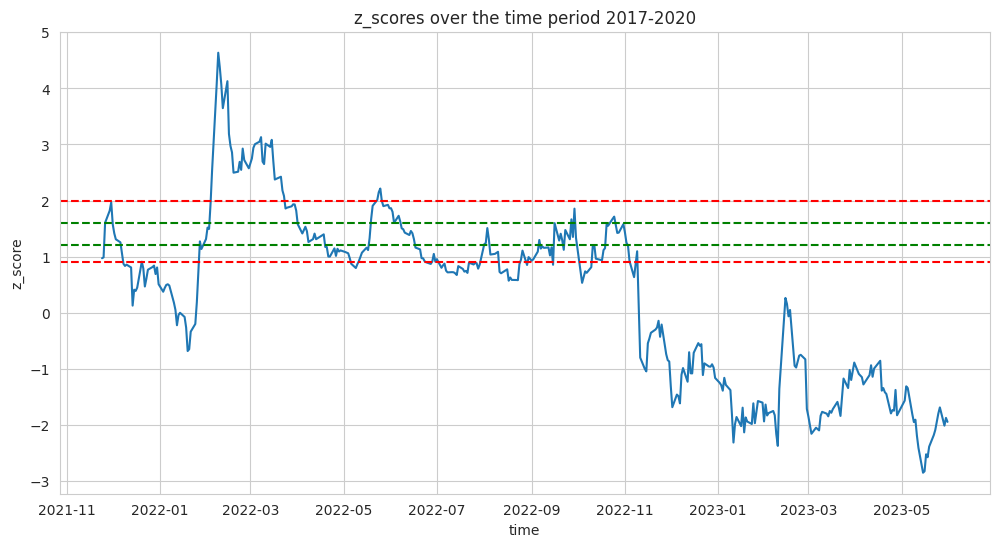

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(fdata['z_scores'])

plt.xlabel('time')
plt.ylabel('z_score')
plt.title('z_scores over the time period 2017-2020')
plt.axhline(1.6, color='green', linestyle='--')
plt.axhline(1.2, color='green', linestyle='--')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(0.9, color='red', linestyle='--')
plt.show()

In [20]:
# Calculate analytic quantile (percentile) thresholds from the z-score distribution
# Use after you have computed fdata['z_scores']
lower_entry = fdata['z_scores'].quantile(0.05)    # 5th percentile (very low)
upper_entry = fdata['z_scores'].quantile(0.95)    # 95th percentile (very high)
exit_level = fdata['z_scores'].median()            # median, often close to 0
print(f"Data-driven entry thresholds:\n  Lower: {lower_entry:.2f}\n  Upper: {upper_entry:.2f}\n  Exit: {exit_level:.2f}")

# Generate signals analytically
# Long (buy spread) when z-score < lower_entry, Short (sell spread) when z-score > upper_entry
fdata['signal1'] = np.select([
    fdata['z_scores'] > upper_entry,
    fdata['z_scores'] < lower_entry
], [1, -1], default=0)

# Position change (as before)
fdata['position1'] = fdata['signal1'].diff()
fdata['signal2'] = -fdata['signal1']
fdata['position2'] = fdata['signal2'].diff()

print(fdata['signal1'].value_counts())
fdata.dropna(inplace=True)

Data-driven entry thresholds:
  Lower: -1.99
  Upper: 2.71
  Exit: 0.79
signal1
 0    458
 1     19
-1     19
Name: count, dtype: int64


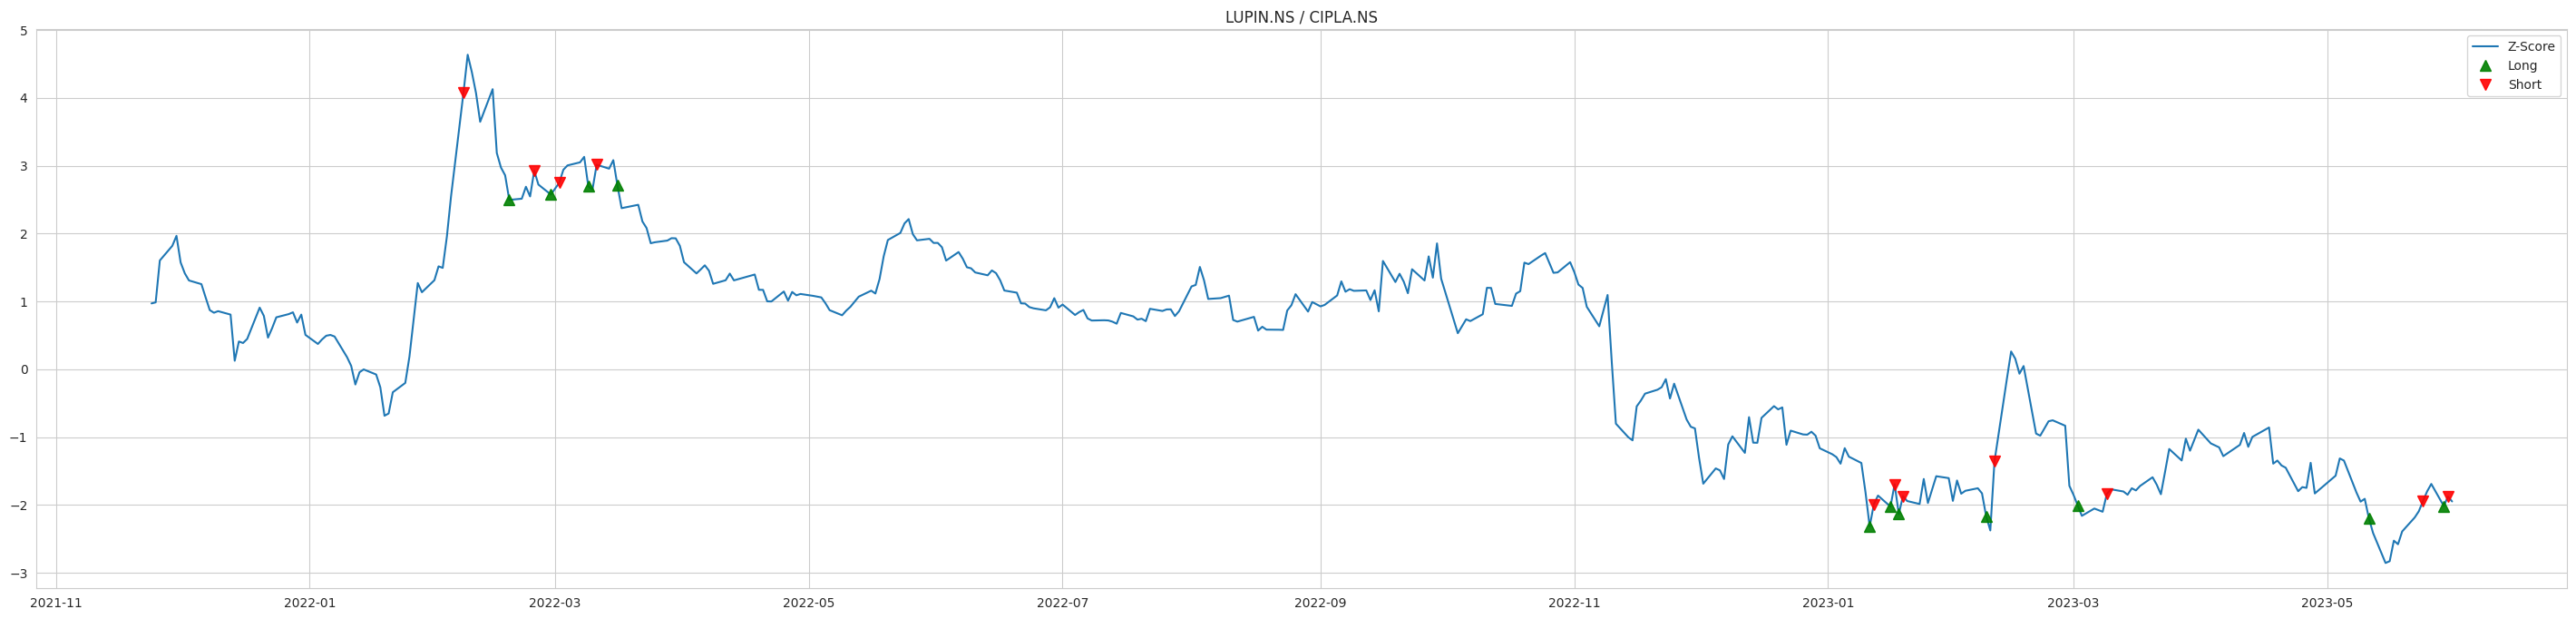

In [21]:

fig = plt.figure(figsize=(36, 8))
bx = fig.add_subplot(111)
series = bx.plot(fdata['z_scores'])
long = bx.plot(fdata['z_scores'][fdata['position1'] == -1], lw = 0, marker = '^', markersize = 8, c = 'g', alpha = 0.9)
short = bx.plot(fdata['z_scores'][fdata['position1'] == 1], lw = 0, marker = 'v', markersize = 8, c = 'r', alpha = 0.9)
stock1 = fstocks[0]
stock2 = fstocks[1]
plt.title(f'{stock2} / {stock1}')
plt.legend(['Z-Score', 'Long', 'Short'])
plt.show()

In [22]:
#initially in position sizing we have divided our capital equally

initial_capital1 = 60000
initial_capital2 = 40000
shares1 = initial_capital1 // fdata['cipla'].iloc[0]
shares2 = initial_capital2 // fdata['lupin'].iloc[0]

portfolio = pd.DataFrame()
portfolio['cipla_holdings'] = fdata['position1'].cumsum() * fdata['cipla'] * shares1
portfolio['cipla_cash'] = initial_capital1 - (fdata['position1'] * fdata['cipla'] * shares1).cumsum()
portfolio['cipla_total'] = portfolio['cipla_holdings'] + portfolio['cipla_cash']
portfolio['cipla_return'] = portfolio['cipla_total'].pct_change()

portfolio['lupin_holdings'] = fdata['position2'].cumsum() * fdata['lupin'] * shares2
portfolio['lupin_cash'] = initial_capital2 - (fdata['position2'] * fdata['lupin'] * shares2).cumsum()
portfolio['lupin_total'] = portfolio['lupin_holdings'] + portfolio['lupin_cash']
portfolio['lupin_return'] = portfolio['lupin_total'].pct_change()

portfolio['total'] = portfolio['cipla_total'] + portfolio['lupin_total']
portfolio.dropna(inplace=True)
portfolio


,cipla_holdings,cipla_cash,cipla_total,cipla_return,lupin_holdings,lupin_cash,lupin_total,lupin_return,total
Date,,,,,,,,,
2021-11-25 00:00:00+05:30,0.000000,60000.000000,60000.000000,0.000000,0.000000,40000.000000,40000.000000,0.000000,100000.000000
2021-11-26 00:00:00+05:30,0.000000,60000.000000,60000.000000,0.000000,0.000000,40000.000000,40000.000000,0.000000,100000.000000
2021-11-29 00:00:00+05:30,0.000000,60000.000000,60000.000000,0.000000,0.000000,40000.000000,40000.000000,0.000000,100000.000000
2021-11-30 00:00:00+05:30,0.000000,60000.000000,60000.000000,0.000000,0.000000,40000.000000,40000.000000,0.000000,100000.000000
2021-12-01 00:00:00+05:30,0.000000,60000.000000,60000.000000,0.000000,0.000000,40000.000000,40000.000000,0.000000,100000.000000
...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00+05:30,0.000000,64478.097473,64478.097473,0.000000,0.000000,37920.829163,37920.829163,0.000000,102398.926636
2023-05-26 00:00:00+05:30,0.000000,64478.097473,64478.097473,0.000000,0.000000,37920.829163,37920.829163,0.000000,102398.926636
2023-05-29 00:00:00+05:30,-64214.177856,128692.275330,64478.097473,0.000000,35720.936279,2199.892883,37920.829163,0.000000,102398.926636


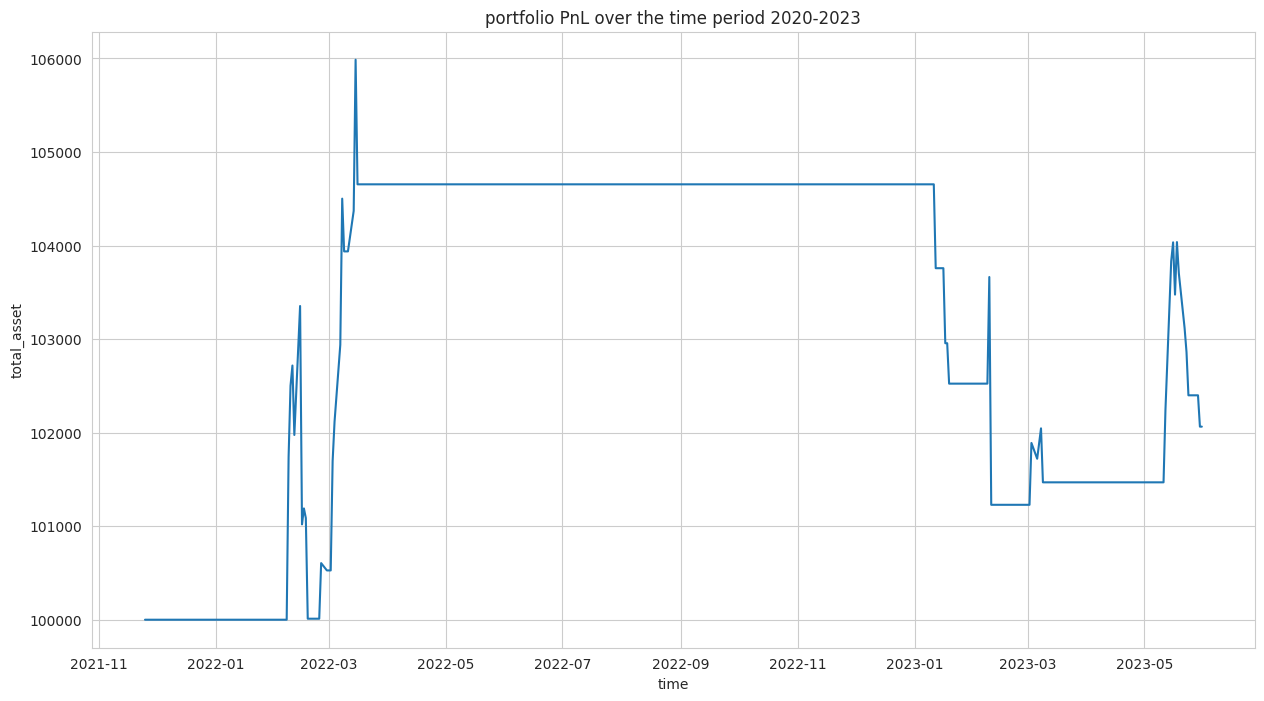

In [23]:
plt.figure(figsize=(15,8),)
plt.plot(portfolio['total'])
plt.title('portfolio PnL over the time period 2020-2023')
plt.xlabel('time')
plt.ylabel('total_asset')
plt.show()